### Yammer Data Challenge
Mike Munsell
<br>
February 27, 2019

#### Summary of findings
The most engagements for Yammer are in countries that experience an "August shutdown" - where workers go on vacation before the school year starts (e.g., United States and the Western Europe). Therefore, the drop we are seeing in engagements in August is <b>most likely due to users being out of the office.</b> 
<br>
<br>
The largest drop in engagements is in Mobile devices (mobile phones and tablets) [Figure 1], particiularly viewing your inbox and sending messages [Figure 2]. This makes sense as users keep their work computers on with "out of the office messages" engaged, but do not send emails on their phone, which is most likely with them on vacation.  

#### Recommendation
Viewing of messages on Mobile devices, the largest driver of the decrease in engagement [Figure 2] has started to increase in the last week of August, so it is best to <b> wait and view the trends for early September <b> before we make any changes.

In [15]:
#Import data and necessary libraries
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline

#Import events data
working_dir = os.getcwd()
events_data = pd.read_csv(os.path.join(working_dir,"data/challenge_2/yammer_events.csv"))
events_data['day_date'] = pd.to_datetime(events_data['occurred_at'].astype(str).str[0:10])
#Print top 5 countries with engagement
print("August is a popular vacation time for many of our top 5 countries")
print(" ")
events_data[events_data.event_type == 'engagement'].groupby(by='location').agg('count').user_id.sort_values(ascending=False).head()

August is a popular vacation time for many of our top 5 countries
 


location
United States     89379
Japan             24584
Germany           22304
France            16469
United Kingdom    15590
Name: user_id, dtype: int64

The largest drop in weekly engagement is on Mobile devices, with desktop computers/laptops remaining fairly stable


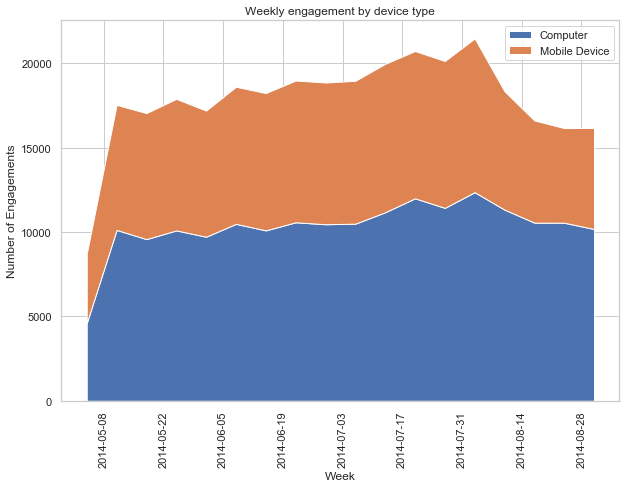

In [18]:
#Create Dataframe grouped by device type and date
plot_device = events_data[events_data.event_type == 'engagement'].groupby(by=['device', \
                                                    'day_date']).agg('count').reset_index()

#Create variable for Mobile
plot_device['Mobile'] = np.where((plot_device.device == 'amazon fire phone') |\
        (plot_device.device == 'htc one') |\
         (plot_device.device == 'iphone 4s') |\
         (plot_device.device == 'iphone 5') |\
         (plot_device.device == 'iphone 5s') |\
         (plot_device.device == 'samsung galaxy note') |\
         (plot_device.device == 'samsung galaxy s4') |\
         (plot_device.device == 'nokia lumia 635') |\
         (plot_device.device == 'ipad mini') |\
         (plot_device.device == 'ipad air') |\
         (plot_device.device == 'kindle fire') |\
         (plot_device.device == 'nexus 10') |\
         (plot_device.device == 'nexus 5') |\
         (plot_device.device == 'nexus 7') |\
         (plot_device.device == 'samsumg galaxy tablet') |\
         (plot_device.device == 'windows surface'), 1, 0)

#Reample everything as weekly total
def weekly_sum(df):
    return(df.resample('W').sum())

#Create v-stack for plotting
device_plotdata = np.vstack((weekly_sum(plot_device[plot_device.Mobile == 0].set_index('day_date').user_id), \
                             weekly_sum(plot_device[plot_device.Mobile == 1].set_index('day_date').user_id)))

print("The largest drop in weekly engagement is on Mobile devices, with desktop computers/laptops remaining fairly stable")

fig, ax = plt.subplots(figsize=(10,7))
ax.stackplot(plot_device.set_index('day_date').resample('W').sum().index, \
             device_plotdata, labels=['Computer', 'Mobile Device'])
ax.set_ylabel('Number of Engagements')
ax.set_xlabel('Week')
plt.xticks(rotation='vertical')
plt.title('Weekly engagement by device type')
plt.legend(loc='best')
plt.show()


The largest drop in weekly engagement is viewing your inbox on a Mobile device, which has been increases during the past week


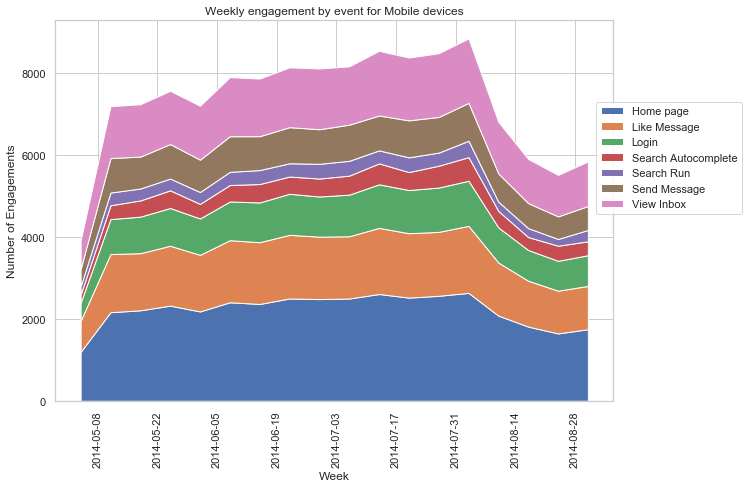

In [20]:
#Create Dataframe grouped by device type, date, and event name
plot_device2 = events_data[events_data.event_type == 'engagement'].groupby(by=['device',\
                                            'event_name', 'day_date']).agg('count').reset_index()

#Create variable for Mobile
plot_device2['Mobile'] = np.where((plot_device2.device == 'amazon fire phone') |\
        (plot_device2.device == 'htc one') |\
         (plot_device2.device == 'iphone 4s') |\
         (plot_device2.device == 'iphone 5') |\
         (plot_device2.device == 'iphone 5s') |\
         (plot_device2.device == 'samsung galaxy note') |\
         (plot_device2.device == 'samsung galaxy s4') |\
         (plot_device2.device == 'nokia lumia 635') |\
         (plot_device2.device == 'ipad mini') |\
         (plot_device2.device == 'ipad air') |\
         (plot_device2.device == 'kindle fire') |\
         (plot_device2.device == 'nexus 10') |\
         (plot_device2.device == 'nexus 5') |\
         (plot_device2.device == 'nexus 7') |\
         (plot_device2.device == 'samsumg galaxy tablet') |\
         (plot_device2.device == 'windows surface'), 1, 0)

#Evaluate type of event
home_page = plot_device2[(plot_device2.event_name == 'home_page') & \
                         (plot_device2.Mobile == 1) ].set_index('day_date').user_id
like_message = plot_device2[(plot_device2.event_name == 'like_message') & \
                            (plot_device2.Mobile == 1)].set_index('day_date').user_id
login = plot_device2[(plot_device2.event_name == 'login')& \
                     (plot_device2.Mobile == 1)].set_index('day_date').user_id
search_autocomplete = plot_device2[(plot_device2.event_name == 'search_autocomplete')& \
                                   (plot_device2.Mobile == 1)].set_index('day_date').user_id
search_run = plot_device2[(plot_device2.event_name == 'search_run')&\
                          (plot_device2.Mobile == 1)].set_index('day_date').user_id
send_message = plot_device2[(plot_device2.event_name == 'send_message') &\
                            (plot_device2.Mobile == 1)].set_index('day_date').user_id
view_inbox = plot_device2[(plot_device2.event_name == 'view_inbox') & \
                          (plot_device2.Mobile == 1)].set_index('day_date').user_id

#Create v-stack for plotting
device2_plotdata = np.vstack((weekly_sum(home_page), weekly_sum(like_message), \
                              weekly_sum(login), weekly_sum(search_autocomplete) ,weekly_sum(search_run),\
                              weekly_sum(send_message), weekly_sum(view_inbox)))


print("The largest drop in weekly engagement is viewing your inbox on a Mobile device, which has been increases during the past week")


fig, ax = plt.subplots(figsize=(10,7))
ax.stackplot(view_inbox.resample('W').sum().index, device2_plotdata, labels=['Home page', 'Like Message', 'Login', 'Search Autocomplete', 'Search Run', 'Send Message', 'View Inbox'])
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8))
ax.set_ylabel('Number of Engagements')
ax.set_xlabel('Week')
plt.xticks(rotation='vertical')
plt.title('Weekly engagement by event for Mobile devices')
plt.show()
